<a href="https://colab.research.google.com/github/keivanipchihagh/Intro_To_MachineLearning/blob/master/Models/Digit_Classification_with_MNIST_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Classification using MNIST - Computer Vision

##### Imports

In [1]:
import keras                              # Keras
import numpy as np                        # Numpy
import pandas as pd                       # Pandas
from matplotlib import pyplot as plt      # Matplotlib
from keras.datasets import mnist          # MNIST Dataset
from keras.utils import to_categorical    # Categorical

##### load Dataset

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
print('Data shape:', train_data.shape)

##### Data Prep

In [3]:
train_data = train_data.reshape(60000, 28, 28, 1)
train_data = train_data.astype('float32') / 255
train_labels = to_categorical(train_labels)

test_data = test_data.reshape(10000, 28, 28, 1)
test_data = test_data.astype('float32') / 255
test_labels = to_categorical(test_labels)

##### building the model

In [4]:
model = keras.models.Sequential()

# convolutional layers
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))

# Dense layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

##### Training the model

In [ ]:
x_val = train_data[:10000]
train_data = train_data[10000:]

y_val = train_labels[:10000]
train_labels = train_labels[10000:]

history = model.fit(train_data, train_labels, epochs = 4, batch_size = 64, verbose = True, validation_data = (x_val, y_val))

##### Evaluating the model

In [15]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc * 100)

313/313 [==============================] - 3s 10ms/step - loss: 0.0865 - accuracy: 0.9786
Test Loss: 0.08654781430959702
Test Accuracy: 97.8600025177002


##### Statistics

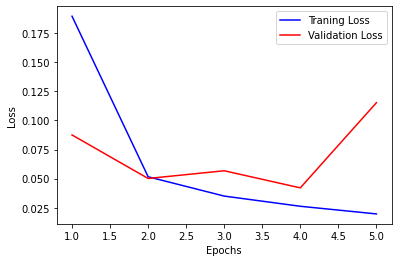

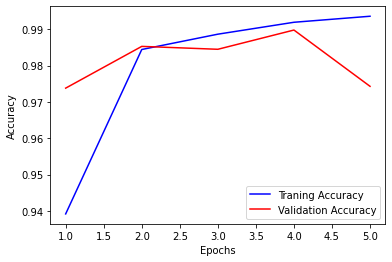

In [12]:
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], 'b', label = 'Traning Loss')
plt.plot(epochs, history.history['val_loss'], 'r', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history.history['accuracy'], 'b', label = 'Traning Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()